In [1]:
# ===================================================================
#                          METADATA
# ===================================================================

# -------------------- General Information --------------------------
# 1. Title: Figure Script
# 2. Description: Script to reproduce Figure 2 in the article
# "Ionic Liquid--Electrode Interface: from One Law To Fit Them All to One Model To Predict Them All".
# 3. Authors:
#    - Ba Long Nguyen (ORCID: 0009-0003-7682-9851)
#    - Vladislav Ivanistsev (ORCID: 0000-0003-4517-0540)
# 4. Contact: balongn99@gmail.com & vladislav.ivanistsev@gmail.com
# 5. Keywords: differential capacitance, ionic liquids, modelling, fitting.

# -------------------- Identifiers & Versioning ---------------------
# 6. Version: 1.0.0
# 7. Date: 
#    - Created: 2025-06-13
#    - Last Modified: 2025-09-24
# 8. DOI: https://doi.org/10.1016/j.elecom.2025.108049

# -------------------- Usage & Accessibility ------------------------
# 10. License: This work is licensed under the MIT License.
# 11. Dependencies:
#     - Python 3.8+
#     - See 'requirements.txt' for necessary libraries (e.g., numpy, pandas, scipy, matplotlib).
# 13. Data Format:
#     - Units: Potential (V), Capacitance (μF/cm²), Surface Charge Density (μC/cm²)

In [2]:
#!/usr/bin/env python3
import numpy as np
import pandas as pd
import numdifftools as nd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

fw = 17/2.54  # inches
fh =  7/2.54  # inches
bw = 4.5/2.54 # inches (box width and height)
gw =   1/2.54 # inches (gap between boxes)

plt.rc('figure',figsize=(fw,fh))       # figure size
plt.rc('figure',      dpi=133)         # figure dpi
plt.rc('lines',  linewidth=1)          # linewidth
plt.rc('font',        size=10)         # fontsize of the text
plt.rc('font', family='sans-serif')    # font family
plt.rc('axes',   titlesize=10)         # fontsize of the axes title
plt.rc('axes',   labelsize=9)          # fontsize of the x and y labels
plt.rc('xtick',  labelsize=8)          # fontsize of the tick labels
plt.rc('ytick',  labelsize=8)          # fontsize of the tick labels
plt.rc('legend', fontsize =8)          # fontsize of the legend
plt.rc('figure', titlesize=10)         # fontsize of the figure title

In [3]:
# ──────────────────── POWER-LAW MODEL ────────────────────
EXCLUDE = np.nan
def a(u, u_M, s_M, k1, k2):
    """vectorised a(u)."""
    expo = k1 + (1 - k1) * np.exp(-k2 * u / u_M)
    if s_M > 0:                         # only right half-plane allowed
        expo = np.where(u >= 0, expo, EXCLUDE)
    else:                               # only left half-plane allowed
        expo = np.where(u <= 0, expo, EXCLUDE)
    return expo

def s_vec(u, u_M, s_M, k1, k2):
    return s_M * (u / u_M)**a(u, u_M, s_M, k1, k2)

def s_wrapper(x, *args, **kwargs):
    return s_vec(x, *args)
  
def C(u, u_M, s_M, k1, k2):
  derivative = nd.Derivative(s_wrapper, step=1e-12)
  return derivative(u, u_M, s_M, k1, k2)

In [4]:
# ──────────────────── DATASETS ────────────────────
data_LCrSAr = {
    "U": np.array([
        -5.01487355e+01, -4.81620574e+01, -4.62025640e+01, -4.42706440e+01,
        -4.23667036e+01, -4.04911668e+01, -3.50395286e+01, -2.81979547e+01,
        -2.49707654e+01, -2.18799229e+01, -1.89318383e+01, -1.61339171e+01,
        -1.34948462e+01, -1.10250123e+01, -8.73714168e+00, -7.66630161e+00,
        -7.15016878e+00, -6.64733887e+00, -6.15817966e+00, -5.68309107e+00,
        -5.22251011e+00, -4.77691699e+00, -4.34684271e+00, -3.93287877e+00,
        -3.53568951e+00, -3.15602845e+00, -2.79476025e+00, -2.45289096e+00,
        -2.02637272e+00, -1.71116511e+00, -1.40925537e+00, -1.26316685e+00,
        -1.12541245e+00, -9.82659290e-01, -8.42006760e-01, -6.93950321e-01,
        -5.49687021e-01, -4.10943103e-01, -3.40702506e-01, -2.73247980e-01,
        -2.14469485e-01, -1.50999468e-01, -9.54695412e-02,  0.00000000e+00,
         7.74612850e-03,  4.70675058e-02,  9.44364759e-02,  1.36374028e-01,
         1.73250987e-01,  2.12719421e-01,  2.79397801e-01,  3.24127881e-01,
         3.66978958e-01,  4.03573350e-01,  4.46565121e-01,  4.80448161e-01,
         5.24812489e-01,  6.16044223e-01,  7.20801474e-01,  8.08169921e-01,
         9.34938742e-01,  1.06475798e+00,  1.19738432e+00,  1.33261450e+00,
         1.47027596e+00,  1.61022008e+00,  1.75231745e+00,  1.89645418e+00,
         2.04252924e+00,  2.19045229e+00,  2.34014202e+00,  2.49152483e+00,
         2.79910749e+00,  3.43198887e+00,  4.08609028e+00,  4.75913998e+00,
         5.44935382e+00,  6.15528914e+00,  6.87575260e+00,  7.60973877e+00,
         9.11495437e+00,  1.02737447e+01,  1.06653082e+01,  1.10594148e+01,
         1.14560056e+01,  1.18550244e+01,  1.22564182e+01]),
    "C": np.array([
        1.00307229, 1.01446288, 1.02835747, 1.04344654, 1.06153041, 1.09121786,
        1.14225669, 1.20672631, 1.26899228, 1.33073335, 1.40017175, 1.48189356,
        1.57963761, 1.69352530, 1.80798510, 1.89829346, 1.96294084, 2.01910535,
        2.07773778, 2.14168248, 2.21199552, 2.28982238, 2.37661880, 2.47422614,
        2.58366439, 2.69207145, 2.75325062, 2.78402865, 2.92059755, 3.15990404,
        3.36313937, 3.48491957, 3.53146585, 3.51711501, 3.48151296, 3.47650621,
        3.52147648, 3.59615058, 3.72953843, 3.92603579, 4.18493686, 5.58533670,
        11.59511821, 20.27711577, 20.42354991, 12.49829713, 7.24941913,
        6.35987009, 6.71441775, 7.68178341, 9.40272944, 11.13403112,
        12.26672762, 12.82597336, 13.01275842, 12.57435476, 11.55121969,
        10.72454917, 10.25203074, 9.48740478, 8.42836374, 7.75108782,
        7.48547756, 7.33709280, 7.21107151, 7.09674822, 6.99207957,
        6.89566642, 6.80638256, 6.72307801, 6.64168654, 6.54541947,
        6.40714103, 6.22761348, 6.04404506, 5.88110398, 5.74002850,
        5.61621026, 5.50251780, 5.38398353, 5.25824759, 5.15708154,
        5.09719529, 5.05989697, 5.02829801, 4.99895271, 4.97476512])
}
data_LCrMAr = {
    "U": np.array([
        -17.77787358, -15.05145359, -13.74185110, -12.46973560, -11.23659809,
        -10.04410656,  -8.89414331,  -7.78885421,  -7.25372101,  -6.73071524,
         -6.22021312,  -5.72262511,  -5.23840135,  -4.76803835,  -4.31208741,
         -3.87116527,  -3.03728873,  -2.27330330,  -1.58872850,  -1.33755603,
         -1.19082486,  -1.05757416,  -0.92841827,  -0.78367518,  -0.66429409,
         -0.53239152,  -0.41019812,  -0.28304792,  -0.14751724,  -0.07951230,
          0.00000000,   0.06237433,   0.12131692,   0.22195643,   0.30622031,
          0.37369298,   0.46491487,   0.54077400,   0.63043964,   0.72647180,
          0.81496090,   0.91713738,   1.11750276,   1.51156245,   1.96439970,
          2.48321079,   2.75653958,   3.03856559,   3.32891427,   3.62725153,
          3.93327702,   4.24671896,   4.56732990,   4.89488345,   5.57000158,
          6.27058846,   6.99536051,   7.74319454,   8.51309739,   9.30418314,
         10.94679343]),
    "C": np.array([
        1.47331288, 1.50854311, 1.55372112, 1.60458302, 1.65902070, 1.71589928,
        1.77371212, 1.83056316, 1.88530549, 1.93847851, 1.99223669, 2.04988118,
        2.11654372, 2.20135999, 2.31905972, 2.48625466, 2.70916719, 2.96977417,
        3.22712632, 3.44023516, 3.59307225, 3.69724601, 3.77363454, 3.83354798,
        3.87337044, 3.88246872, 3.85744684, 3.81510190, 3.79714530, 3.86113416,
        4.05849361, 4.40800382, 4.87483016, 5.36732917, 5.76627644, 5.98186524,
        5.99826142, 5.86790874, 5.66662126, 5.45089275, 5.24167502, 5.03085923,
        4.79853291, 4.53351646, 4.24812124, 3.97450119, 3.74349049, 3.56612318,
        3.43360735, 3.32979454, 3.24118584, 3.15908969, 3.07793363, 2.99427021,
        2.90722509, 2.81854462, 2.73113194, 2.64730200, 2.56882257, 2.49899593,
        2.44448020])
}
data_LCrLAr = {
    "U": np.array([
        -9.48296131, -8.92268243, -8.32887218, -7.77877917, -7.32939867,
        -6.80986257, -6.28129954, -5.64864085, -5.22112020, -4.67975076,
        -4.25953029, -3.79543701, -3.44081236, -3.01846631, -2.60948707,
        -2.24558234, -1.90789925, -1.60794597, -1.31099895, -1.16951502,
        -1.03081814, -0.89776540, -0.77103065, -0.64727141, -0.52097747,
        -0.40406226, -0.28278421, -0.15112900, -0.07508979,  0.00000000,
         0.07508979,  0.15112900,  0.28278421,  0.40406226,  0.52097747,
         0.64727141,  0.77103065,  0.89776540,  1.03081814,  1.16951502,
         1.31099895,  1.60794597,  1.90789925,  2.24558234,  2.60948707,
         3.01846631,  3.44081236,  3.79543701,  4.25953029,  4.67975076,
         5.22112020,  5.64864085,  6.28129954,  6.80986257,  7.32939867,
         7.77877917,  8.32887218,  8.92268243,  9.48296131]),
    "C": np.array([
        2.10905669, 1.89902351, 1.86226689, 1.95837238, 1.99454473, 1.92734892,
        1.89832308, 1.98700493, 2.09557184, 2.18633209, 2.31478385, 2.45986702,
        2.52396524, 2.53893668, 2.65202892, 2.87385999, 3.11852887, 3.31899949,
        3.46305517, 3.57908082, 3.70269864, 3.83832310, 3.95042170, 4.02962845,
        4.09283242, 4.07063651, 3.87461610, 3.58714375, 3.39423852, 3.34091076,
        3.39423852, 3.58714375, 3.87461610, 4.07063651, 4.09283242, 4.02962845,
        3.95042170, 3.83832310, 3.70269864, 3.57908082, 3.46305517, 3.31899949,
        3.11852887, 2.87385999, 2.65202892, 2.53893668, 2.52396524, 2.45986702,
        2.31478385, 2.18633209, 2.09557184, 1.98700493, 1.89832308, 1.92734892,
        1.99454473, 1.95837238, 1.86226689, 1.89902351, 2.10905669])
}

df_LCrSAr = pd.DataFrame(data_LCrSAr)
df_LCrMAr = pd.DataFrame(data_LCrMAr)
df_LCrLAr = pd.DataFrame(data_LCrLAr)

# parameters exactly as supplied earlier
params = {  #    s_M     u_M        k1         k2
    "SAr":  ( 68,   11.059425, 0.782130, 23.644684),
    "LCrS": (-16,   -5.683091, 0.720783,  3.833208),
    "MAr":  ( 28,    7.743195, 0.762454, 13.857427),
    "LCrM": (-16,   -5.722625, 0.735736,  6.269343),
    "LAr":  ( 16,    5.648640, 0.745728,  6.648114),
    "LCrL": (-16,   -5.648640, 0.745728,  6.648114),
}

/home/ba-long/miniconda-fresh/envs/jlab/lib/python3.12/site-packages/numdifftools/limits.py:150: UserWarning: All-NaN slice encountered
  warnings.warn(str(msg))
/tmp/ipykernel_12084/122628968.py:146: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


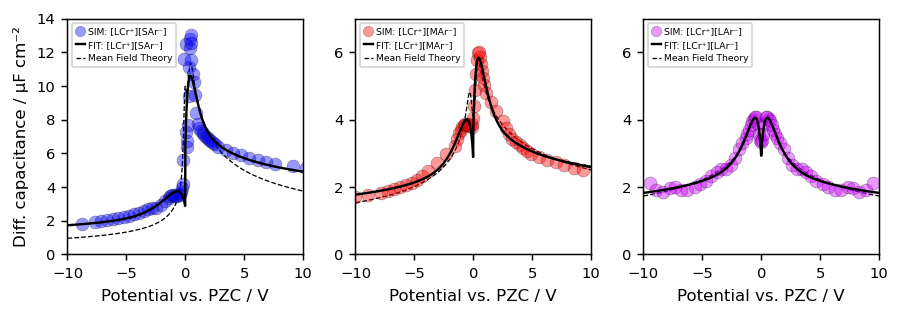

In [5]:
# ---------------------------------------------------------------------
# ANALYTIC “FIT” CURVES
# --------------------------------------------------------------------
u_grid = np.linspace(-10, 10, 1000)

C_values = {}

for ion, param in params.items():
    C_values[ion] = [C(u, param[1], param[0], param[2], param[3]) for u in u_grid]
  
joint_Cdata = {}

joint_Cdata["FIT: [LCr⁺][SAr⁻]"] = np.concatenate((np.asarray(C_values['LCrS'])[~np.isnan(np.asarray(C_values['LCrS']))],
                                            np.asarray(C_values['SAr'])[~np.isnan(np.asarray(C_values['SAr']))]
                                           ))
joint_Cdata["FIT: [LCr⁺][MAr⁻]"] = np.concatenate((np.asarray(C_values['LCrM'])[~np.isnan(np.asarray(C_values['LCrM']))],
                                            np.asarray(C_values['MAr'])[~np.isnan(np.asarray(C_values['MAr']))]
                                           ))
joint_Cdata["FIT: [LCr⁺][LAr⁻]"] = np.concatenate((np.asarray(C_values['LCrL'])[~np.isnan(np.asarray(C_values['LCrL']))],
                                            np.asarray(C_values['LAr'])[~np.isnan(np.asarray(C_values['LAr']))]
                                           ))
# ------------------------------------------------------------------
# Kornyshev model
# ------------------------------------------------------------------
k_B, e, T = 1.380649e-23, 1.602176634e-19, 450

def kornyshev(phi, Cd0, yp, ym, alpha, CH):
    # Physical constants
    e = 1.602176634e-19    # elementary charge, C
    k_B = 1.380649e-23     # Boltzmann constant, J/K
    T = 298.15             # temperature, K

    Cd0_SI = Cd0 * 1e-2
    CH_SI = CH * 1e-2

    u_red  = e * phi / (k_B * T)
    gamma  = ym + (yp - ym) / (1 + np.exp(alpha*u_red))
    sinh2  = np.sinh(alpha*u_red/2)**2
    logt   = np.log1p(2*gamma*sinh2)
    logt   = np.where(logt==0, np.finfo(float).eps, logt)
    ratio  = 2*gamma*sinh2/logt
    ratio  = np.where(ratio<=0, np.finfo(float).eps, ratio)

    D = Cd0_SI * np.cosh(alpha*u_red/2)/(1+2*gamma*sinh2) * np.sqrt(ratio)
    # denominator (like equation): C_H^{-1} + D^{-1}
    denominator = (1/CH_SI) + (1/D)
    Cd_SI = 1/denominator
    return Cd_SI/1e-2  # back to μF/cm²
def fit_kornyshev(U, C):
    m = (U>=-10)&(U<=10)
    p0 = (np.nanmedian(C[m]), 0.6, 0.3, 0.05, 5)      # added CH initial guess
    b = ([0.1, 0.01, 0.01, 0.001, 0],                 # lower bounds
         [20,  10,   1.2, 1,     20])                 # upper bounds
    popt, _ = curve_fit(kornyshev, U[m], C[m], p0=p0, bounds=b, max_nfev=20000)
    return dict(Cd0=popt[0], yp=popt[1], ym=popt[2], alpha=popt[3], CH=popt[4])

fits={
    "[LCr⁺][SAr⁻]":fit_kornyshev(df_LCrSAr.U.values,df_LCrSAr.C.values),
    "[LCr⁺][MAr⁻]":fit_kornyshev(df_LCrMAr.U.values,df_LCrMAr.C.values),
    "[LCr⁺][LAr⁻]":fit_kornyshev(df_LCrLAr.U.values,df_LCrLAr.C.values),
}

# ------------------------------------------------------------------
# Plot – layout & legend exactly like your original
# ------------------------------------------------------------------
import matplotlib.pyplot as plt
cols  = {"[LCr⁺][SAr⁻]": "blue",
         "[LCr⁺][MAr⁻]": "red",
         "[LCr⁺][LAr⁻]": "#cc00ffff"}

dfs   = {"[LCr⁺][SAr⁻]": df_LCrSAr,
         "[LCr⁺][MAr⁻]": df_LCrMAr,
         "[LCr⁺][LAr⁻]": df_LCrLAr}

marks = {k: ("o", 7) for k in dfs}

# ---- choose limits & ticks per panel --------------------------------
ylims  = [(0, 14),     
          (0,  7),        
          (0,  7)]       

yticks = [np.arange(0, 16, 2),   # 0,5,10,…
          np.arange(0,  8, 2),   # 0,1,2,…
          np.arange(0,  8, 2)]   # 0,1,2,…

# --------------------------------------------------------------------

n_panels = len(dfs)

fig = plt.figure(figsize=(fw, fh))

axs = []
for i in range(3):
    left_in   = (0.43+i * (bw + gw))      # 1 cm initial margin
    bottom_in = (fh - bw) / 2            # center vertically

    left   = left_in / fw
    bottom = bottom_in / fh
    width  = bw / fw
    height = bw / fh

    ax = fig.add_axes([left, bottom, width, height])
    ax.set_aspect('auto')
    ax.set_xlabel("Potential vs. PZC / V")
    if i == 0:
        ax.set_ylabel("Diff. capacitance / μF cm⁻²")
    axs.append(ax)

# ---- 2. Plotting ----
for i, (name, df) in enumerate(dfs.items()):
    ax      = axs[i]
    m, ms   = marks[name]
    color   = cols[name]

    # Plot 1: SIM
    sim_label = f"SIM: {name}"
    ax.errorbar(df.U, df.C, fmt=m, color=color,
                markersize=ms, markeredgecolor="black",
                markeredgewidth=0.3, alpha=0.4,
                label=sim_label)

    # Plot 2: FIT
    fit_label = f"FIT: {name}"
    ax.plot(u_grid, joint_Cdata[fit_label], color='black',
            lw=1.3, label=fit_label, zorder=100)

    # Plot 3: Mean Field Theory
    mft_label = "Mean Field Theory"
    ax.plot(u_grid, kornyshev(u_grid, **fits[name]),
            color="black", ls="--", lw=0.7, label=mft_label)

    ax.set_xlim(-10, 10)
    ax.set_ylim(*ylims[i])
    ax.set_yticks(yticks[i])
    ax.tick_params(axis="y", length=3)

    # Manually reorder legend items
    handles, labels = ax.get_legend_handles_labels()
    label_order = [sim_label, fit_label, mft_label]
    ordered_handles = [handles[labels.index(lab)] for lab in label_order]

    ax.legend(ordered_handles, label_order,
              loc="upper left",
              markerscale=0.8, handlelength=1, handletextpad=0.3, fontsize=5)

fig.tight_layout()       
# plt.savefig("Figure_2_LCrX3panel.pdf", dpi=600, bbox_inches='tight')
plt.show()